# Analisando o engajamento do Instagram

### Perguntas de negócio?
- Qual tipo de conteúdo **mais engaja** no Instagram da empresa análisada?
<br><br>
- Temos a base de dados do Instagram **desde que o usuário começou a postar na marca até o dia 27/março**
<br><br>
- Ele também dá alguns direcionamentos:
    - Ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações
    - Tags vazias é que realmente não possuem tag (favor tratar como vazio)

### Importando e visualizando a base

In [59]:
# Importando o pandas
import pandas as pd

In [60]:
# Importar a base em excel
# - Base: 08. Analisando o engajamento no Instagram.xlsx
df = pd.read_excel('08. Analisando o engajamento no Instagram.xlsx')

In [61]:
# Visualizando as 5 primeiras linhas
df.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,"82,878.00",Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


### Como o cliente pediu para não considerar a coluna visualizações, vamos retirar essa coluna da base

In [62]:
# Apagando a coluna "Visualizações"
df = df.drop("Visualizações",axis=1)

In [63]:
# Visualizando novamente as 5 primeiras linhas
df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [64]:
# Visualizando as 5 últimas linhas
df.tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,NaN,5566
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,NaN,29563
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,NaN,4999


In [65]:
# Tamanho da base
df.shape

(52, 9)

In [66]:
# Verificando as informações e metadados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


### Carrossel possui apenas 8 valores não nulos
- Vamos entender os valores de carrossel

In [67]:
# Contando os valores que aparecem na coluna Carrossel
df['Carrossel'].value_counts()

Carrossel
S    8
Name: count, dtype: int64

- Na verdade, os valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser "N"

### Tratando os valores nulos

In [71]:
# Atribuindo 'N' na coluna Carrossel para os registros que são Nulos
df.loc[df['Carrossel'].isnull(),'Carrossel'] = 'N'

**Verificando novamente os valores de Carrossel:**

In [72]:
# Verificando novamente os valores dessa coluna
df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


### Mostrando as informações estatísticas

In [73]:
# Descrição estatística da base
round(df.describe(),2)

,Data,Curtidas,Comentários,Interacoes
count,52,52.00,52.00,52.00
mean,2021-12-23 04:36:55.384615424,"12,262.73",189.50,"12,452.23"
min,2021-09-11 00:00:00,"2,807.00",9.00,"2,816.00"
25%,2021-10-23 06:00:00,"5,492.00",69.50,"5,562.50"
50%,2022-01-05 00:00:00,"9,603.00",128.00,"9,773.50"
75%,2022-02-15 12:00:00,"17,621.75",265.25,"17,920.75"
max,2022-03-27 00:00:00,"37,351.00",852.00,"37,853.00"
std,NaN,"8,165.88",170.69,"8,299.39"


### Visualizando essas informações de maneira gráfica

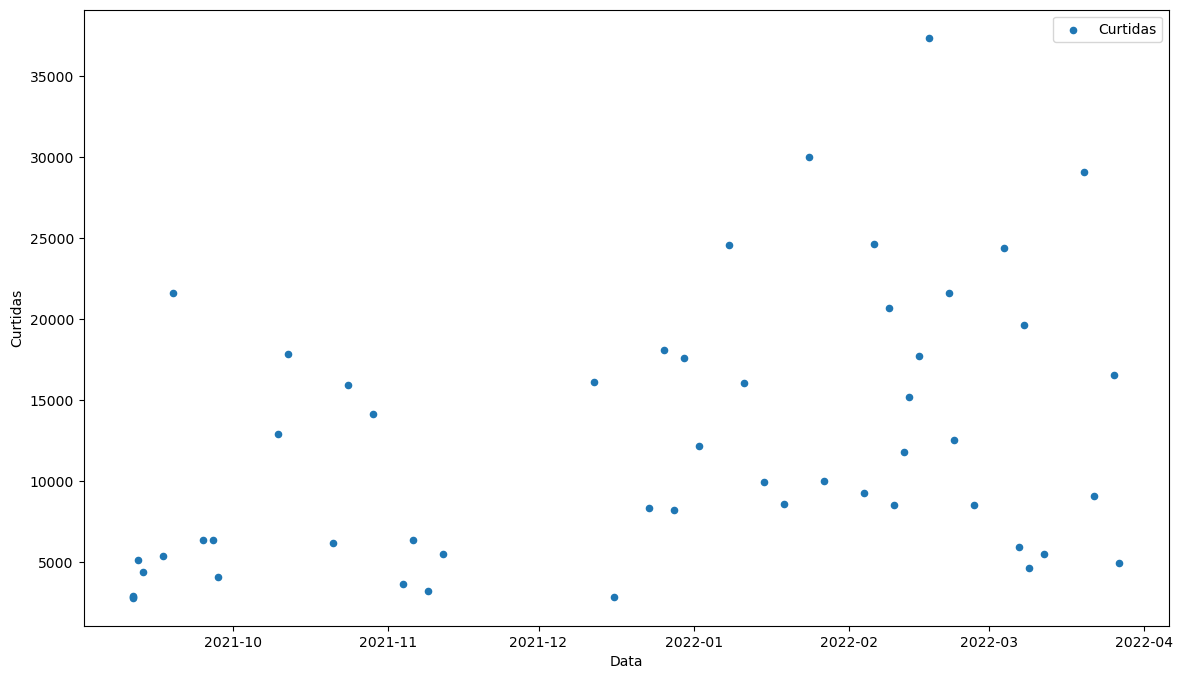

In [75]:
# Um gráfico de dispersão para entender melhor a coluna de Curtidas ao logo do tempo
df.plot(kind="scatter",x="Data",y="Curtidas",figsize=(14,8),label ='Curtidas');

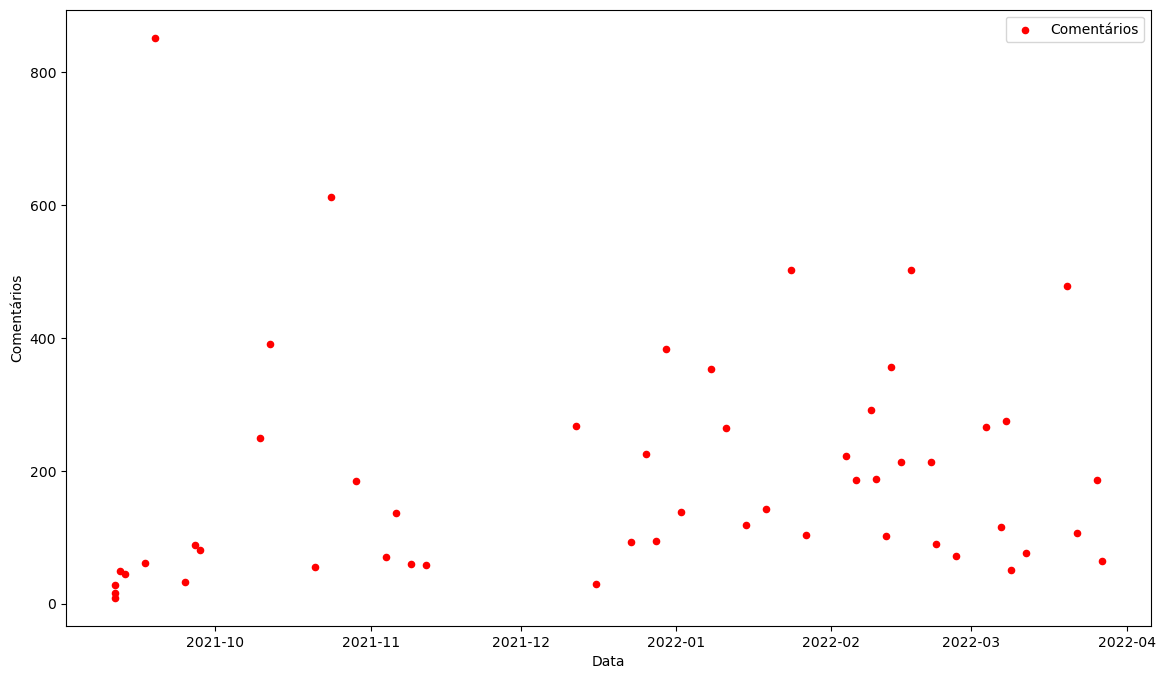

In [74]:
# Um gráfico de dispersão para entender melhor a coluna de Comentários ao logo do tempo
df.plot(kind="scatter",x="Data",y="Comentários",color="red",label="Comentários",figsize=(14,8));

- O gráfico e as informações estatítiscas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários
- Vamos verificar se existe um padrão usando as outras colunas de informações

### A primeira coisa que vamos fazer é pegar os 5 primeiros registros com mais e menos curtidas

In [76]:
# Ordenando os valores
df.sort_values(by="Curtidas",ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [77]:
# Selecionando os 5 últimos valores 
df.sort_values(by='Curtidas',ascending=True).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273


- Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha
- Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas
<br><br>
- **Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas**

### Vamos usar o <font color="blue">group by</font> para entender melhor os dados

In [78]:
# Para melhorar a visualização, vamos criar um padrão no formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [99]:
# Agrupando as informações por tipo
df.groupby("Tipo")["Comentários"].mean().sort_values(ascending=False)

Tipo
Reels   244.40
Foto    193.42
Vídeo   166.83
IGTV    133.60
Name: Comentários, dtype: float64

- **Nesse caso pode parecer que vídeo e IGTV são estratégias ruins que não devem ser usadas**

In [101]:
# Agrupando por Tipo e Pessoas
df.groupby(["Tipo","Pessoas"])[["Curtidas"]].mean()

Curtidas
Tipo  Pessoas          
Foto  N        3,863.50
      S       15,236.67
IGTV  S        6,833.40
Reels N        5,934.50
      S       20,832.00
Vídeo N        4,007.50
      S       16,409.50

**E também aplicar a função de agregação em várias outras colunas:** <br>

In [97]:
df.groupby(["Tipo","Pessoas"])[["Curtidas",'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

In [25]:
# Incluindo a coluna de campanhas
df.groupby(['Tipo','Pessoas','Campanhas'])[['Curtidas','Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                       
Foto  N       N          2,869.00        20.50
              S          5,852.50        47.50
      S       N         10,815.29       159.93
              S         19,105.38       284.19
IGTV  S       N          6,833.40       133.60
Reels N       N          5,934.50        98.00
      S       N         12,894.00       249.00
              S         24,801.00       388.50
Vídeo N       N          4,007.50        65.25
      S       S         16,409.50       370.00

- O groupby já permite ver que publicações de campanha tem um grande engajamento e com foto de pessoas também

**Podemos então fazer os agrupamentos que acharmos melhor para entender os nossos dados**

In [102]:
# Somente para pessoas
df.groupby('Pessoas')[['Comentários','Curtidas','Interacoes ']].mean()

,Comentários,Curtidas,Interacoes
Pessoas,,,
N,52.83,"4,256.67","4,309.50"
S,230.50,"14,664.55","14,895.05"


- **Postagens com pessoas engajam muito mais para essa marca, sendo 3 vezes maior de quando não tem pessoas**

In [103]:
# Somente para campanhas
df.groupby('Campanhas')[['Comentários','Curtidas','Interacoes ']].mean()

,Comentários,Curtidas,Interacoes
Campanhas,,,
N,123.17,"7,928.33","8,051.50"
S,279.95,"18,173.27","18,453.23"


- **Quando é uma postagem de campanha, o engajamento também é melhor!**

In [105]:
#Analisando o Carrossel (Filtrando por foto, pois é o único tipo que possui Sim para carrossel)
df[df['Tipo'] == 'Foto'].groupby('Carrossel')[['Comentários','Curtidas']].mean()

,Comentários,Curtidas
Carrossel,,
N,208.57,"13,776.36"
S,140.38,"11,817.88"


- **A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente**
    - Nesse caso filtramos apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

**Colocando pessoas e campanhas juntos podemos ver como se dá essa diferença**

In [106]:
# Agregando por pessoas e campanhas
df.groupby(['Pessoas','Campanhas'])[['Comentários','Curtidas']].mean().round(2)

Comentários  Curtidas
Pessoas Campanhas                       
N       N                53.90  3,937.50
        S                47.50  5,852.50
S       N               157.80  9,923.75
        S               303.20 19,405.35

- **A média quando tem pessoas E é publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10 mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas**
<br><br>
- **Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento**

In [107]:
# Agregando por pessoas, campanhas e tipo
df.groupby(['Pessoas','Campanhas','Tipo'])[['Comentários','Curtidas']].mean().round(2)

Comentários  Curtidas
Pessoas Campanhas Tipo                        
N       N         Foto         20.50  2,869.00
                  Reels        98.00  5,934.50
                  Vídeo        65.25  4,007.50
        S         Foto         47.50  5,852.50
S       N         Foto        159.93 10,815.29
                  IGTV        133.60  6,833.40
                  Reels       249.00 12,894.00
        S         Foto        284.19 19,105.38
                  Reels       388.50 24,801.00
                  Vídeo       370.00 16,409.50

- **Analisando novamente a questão do vídeo, ele não parece mais tão ruim assim. Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo a foto**
- O que poderia ter levado a média baixa é que só temos vídeo ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoa ou campanha)
- Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

#### Inclusive podemos entender o que havia gerado a média baixo no vídeo

In [108]:
# Vamos filtrar a base apenas onde o tipo é Vídeo
df[df['Tipo'] == 'Vídeo']

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


- **Aqui percebemos que a loja tentou postar 4 vídeos mostrando seus produtos (sem nenhuma pessoa) e o resultado foi baixo. Quando o vídeo foi feito com pessoas aproveitando trends e datas comemorativas o resultado foi muito bom!**

## Conclusões
- **Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que não possui ninguém**
- **Postagens em épocas de campanha também possuem um melhor engajamento**
- **Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca**

# Analisando as Tags

In [109]:
df.head(2)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958


In [110]:
df.groupby('Tags')['Interacoes '].mean().round(2)

Tags
Datas comemorativas                 18,273.33
Datas comemorativas/Promoções       29,563.00
Dicas de como usar/Novos Produtos    5,800.00
Dicas de como usar/Produtos          7,745.00
Influenciadores                     15,359.00
Loja                                 2,845.00
Loja/Produtos                        2,958.00
Novos Produtos                      11,847.29
Produtos                             5,737.58
Promoções                           27,202.50
Trends                              22,787.33
Trends/Produtos                     13,143.00
Name: Interacoes , dtype: float64

### Para conseguirmos analisar separadamente as tags, vamos dividir linhas com 2 tags em 2 linhas
- Para isso primeiro vamos usar o split para separar em uma lista com as tags
- Depois vamos usar o explode para transformar as listas com 2 tags em 2 linhas diferentes

In [111]:
df['Tags'] = df['Tags'].str.split("/")

In [112]:
df.head(2)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958


In [113]:
df = df.explode('Tags')

In [114]:
df.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164


In [115]:
df.groupby('Tags')['Interacoes '].mean().sort_values(ascending=False).round(2)

Tags
Promoções             27,989.33
Datas comemorativas   21,095.75
Trends                20,376.25
Influenciadores       15,359.00
Novos Produtos        10,503.44
Dicas de como usar     6,967.00
Produtos               6,363.94
Loja                   2,882.67
Name: Interacoes , dtype: float64

- **Postagens de promoções são as que mais engajam**
- **Além de promoções, datas comemorativas e trends também possuem um bom engajamento**

In [118]:
# Temos registros sem Tag definida
df['Tags'].value_counts(dropna=False)

Tags
Produtos               17
Novos Produtos          9
Sem Tag                 8
Influenciadores         7
Dicas de como usar      5
Trends                  4
Datas comemorativas     4
Loja                    3
Promoções               3
Name: count, dtype: int64

In [119]:
# Vamos tratar

df['Tags'].fillna('Sem Tag',inplace=True)

In [120]:
# Verificando se deu certo
df['Tags'].value_counts(dropna=False)

Tags
Produtos               17
Novos Produtos          9
Sem Tag                 8
Influenciadores         7
Dicas de como usar      5
Trends                  4
Datas comemorativas     4
Loja                    3
Promoções               3
Name: count, dtype: int64

In [121]:
df.groupby(['Pessoas','Tags'])['Interacoes '].mean().sort_values(ascending=False).round(2)

Pessoas  Tags               
S        Promoções             27,989.33
         Datas comemorativas   21,095.75
         Trends                20,376.25
         Sem Tag               15,555.62
         Influenciadores       15,359.00
         Novos Produtos        11,138.75
         Produtos               8,448.00
         Dicas de como usar     6,967.00
N        Novos Produtos         5,421.00
         Produtos               4,511.44
         Loja                   2,882.67
Name: Interacoes , dtype: float64

## Conclusões
- **Ter o rosto de outras pessoas é fundamental para um bom engajamento na publicação**
    - Em todas as tags, quando havia o rosto, o resultado foi muito melhor
- **Criar campanhas ajuda muito na divulgação da marca**
- **Promoções tiveram um desempenho absurdamente maior que qualquer outra tag**
    - Porém é uma tag que pode ter custo para a loja, o que deve ser analisado
- **Usar conteúdos que estão em trend também ajudam na divulgação da marca, mesmo a trend sendo de outros nichos**
- **A melhor maneira de mostrar produtos é através de outras pessoas utilizando-os, e se possível em campanhas de datas especiais**
- **Para novos produtos a inclusão de pessoas é mais crítica ainda, sendo quase o dobro quando há um rosto junto ao produto**
- **Não podemos afirmar que a tag `Loja` é ruim até testarmos essa tag incluindo pessoas ou em uma campanha. Vale o teste para verificar**
- **Continuaremos a monitorar as postagens para encontrar novos padrões dado que ainda temos poucas informações da base**